In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('avocado.csv',index_col=0)

In [3]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
#df = df.drop(['4046','4225','4770'],axis=1)

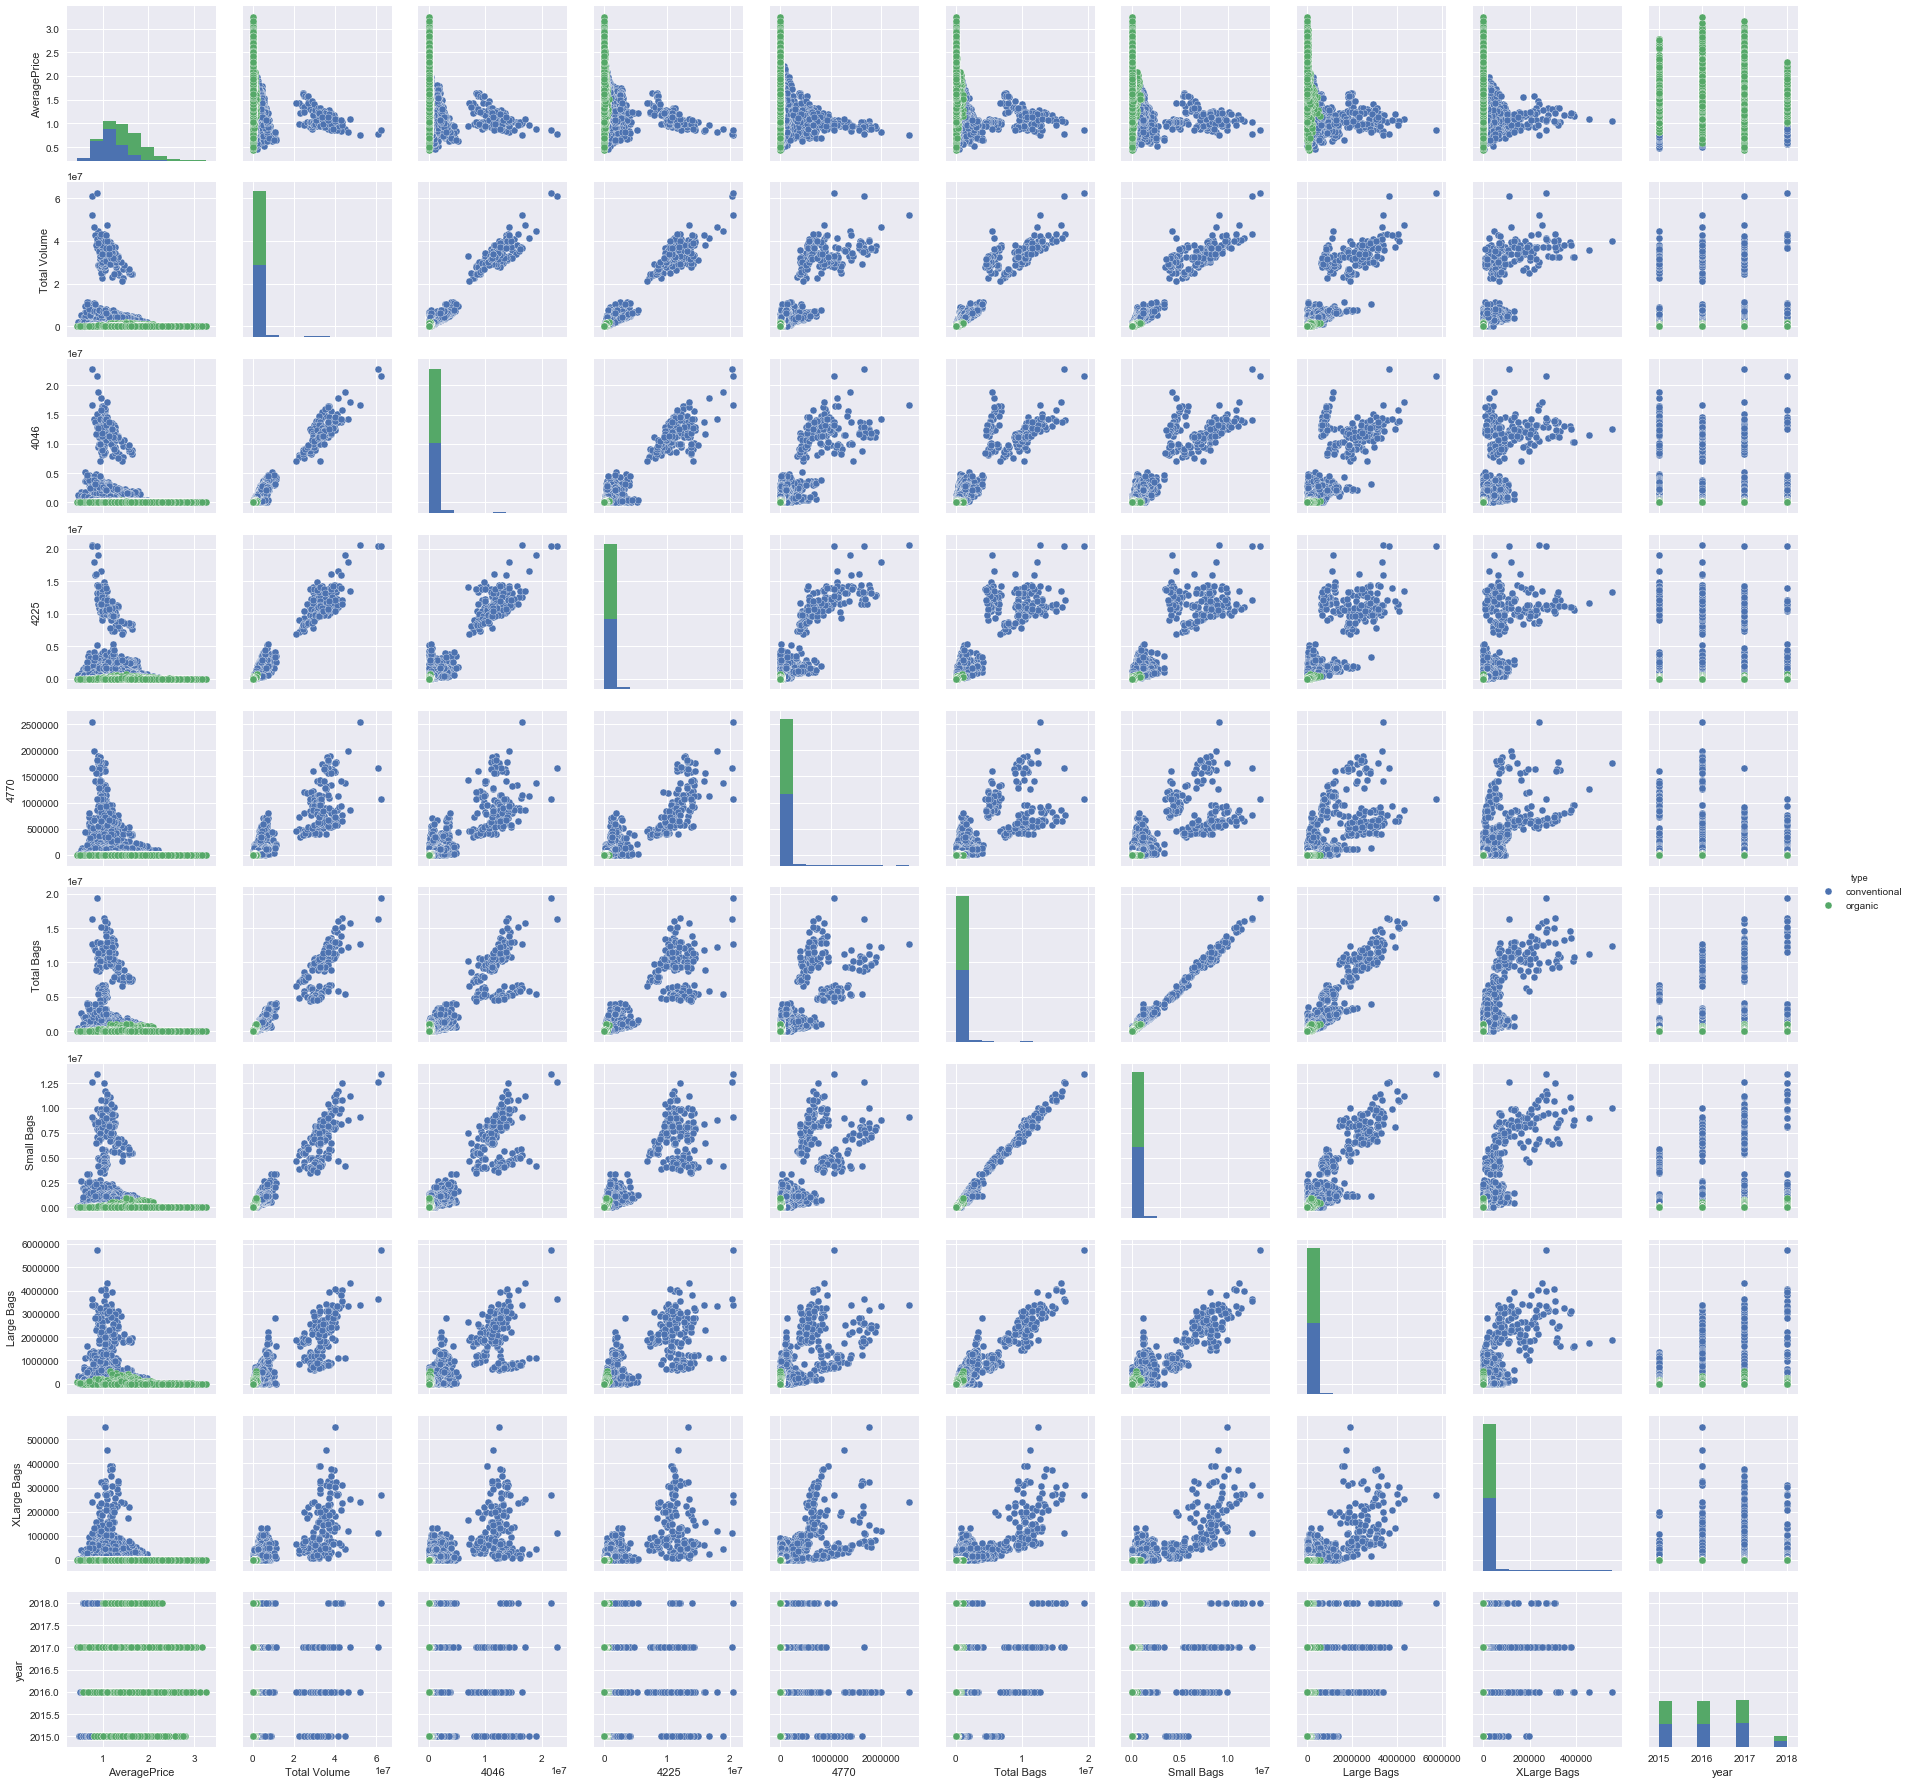

In [33]:
sns.pairplot(df,hue='type')

Linear Regression:

In [39]:
X = df.drop(['AveragePrice','type', 'year','region','Date'], axis=1)
Y = df['AveragePrice']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm = LinearRegression()

In [44]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
print("Coefficients: ")
print(lm.coef_)

Coefficients: 
[ 0.00039092 -0.00039103 -0.00039084 -0.00039142  0.01658501 -0.01697591
 -0.01697602 -0.01697447]


In [46]:
prediction = lm.predict(X_test)

Text(0,0.5,'Predicted Y')

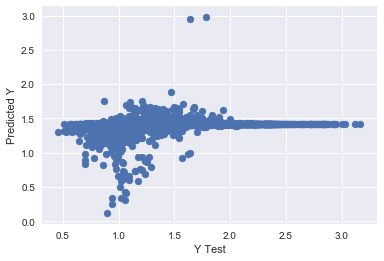

In [47]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [48]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Volume,0.000391
4046,-0.000391
4225,-0.000391
4770,-0.000391
Total Bags,0.016585
Small Bags,-0.016976
Large Bags,-0.016976
XLarge Bags,-0.016974


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


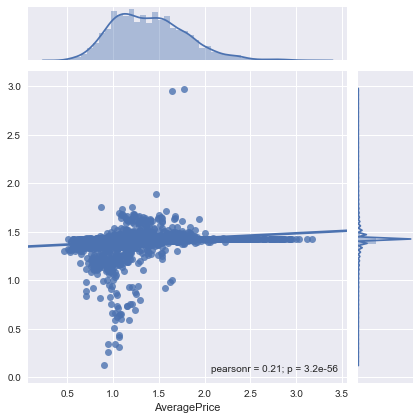

In [49]:
sns.set(style="darkgrid")
sns.jointplot(y_test, prediction, data=df, kind="reg")

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


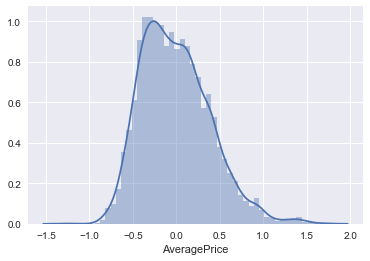

In [50]:
sns.distplot((y_test-prediction),bins=50)

In [51]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.3174643325437174
MSE: 0.15564414607134813
RMSE: 0.3945176118646012


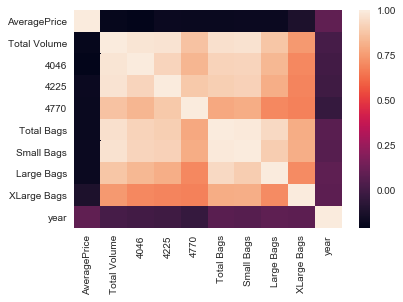

In [38]:
sns.heatmap(df.corr())